In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

## Load the dataset
California housing dataset

In [2]:
data = fetch_california_housing()
X = data.data
y = data.target

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
data.feature_names


Shape of X: (20640, 8)
Shape of y: (20640,)


['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [3]:
# Split dataset into training and test set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a Single LASSO Model

In [5]:
alpha = 0.1  # regularization strength

lasso = Lasso(alpha=alpha, max_iter=5000)
lasso.fit(X_train_scaled, y_train)

print("Lasso Coefficients:")
print(lasso.coef_)

print("\nIntercept:", lasso.intercept_)
print("\nTest R^2:", lasso.score(X_test_scaled, y_test))

Lasso Coefficients:
[ 0.71059779  0.1064527  -0.          0.         -0.         -0.
 -0.01146856 -0.        ]

Intercept: 2.0719469373788817

Test R^2: 0.48136113250290746


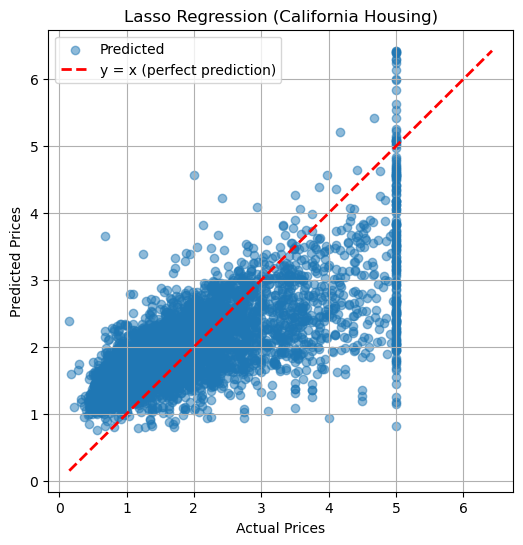

In [6]:
y_pred = lasso.predict(X_test_scaled)
plt.figure(figsize=(6,6))

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted")

# Plot the line y = x
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 
         'r--', linewidth=2, label="y = x (perfect prediction)")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Lasso Regression (California Housing)")
plt.grid(True)
plt.legend()
plt.show()


This scatter plot compares the actual median house values (x-axis) with the LASSO-predicted values (y-axis) on the California Housing dataset. Each point represents one test sample. 

In [7]:
def run_sklearn_lasso(alpha=0.1):
    data = fetch_california_housing()
    X, y = data.data, data.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = Lasso(alpha=alpha, max_iter=5000)
    model.fit(X_train_scaled, y_train)

    print("alpha =", alpha)
    print("Coefficients:", model.coef_)
    print("Test R^2:", model.score(X_test_scaled, y_test))

    return model

model = run_sklearn_lasso(alpha=0.1)


alpha = 0.1
Coefficients: [ 0.71059779  0.1064527  -0.          0.         -0.         -0.
 -0.01146856 -0.        ]
Test R^2: 0.48136113250290746


## Try different $\alpha$ value

In [8]:
def lasso_alpha_sweep(X_train_scaled, y_train, X_test_scaled, y_test, alphas, feature_names):
    """
    Run LASSO over a range of alpha values and produce:
      - coefficient paths
      - R² vs alpha plot
      - MSE vs alpha plot

    Parameters
    ----------
    X_train_scaled : ndarray
        Normalized training features.
    y_train : ndarray
        Training labels.
    X_test_scaled : ndarray
        Normalized test features.
    y_test : ndarray
        Test labels.
    alphas : array-like
        List of alpha values.
    feature_names : list of str
        Names of features.

    Returns
    -------
    results : dict
        Contains:
            'coefs', 'r2', 'mse', 'nnz'
    """
    coefs = []
    r2_list = []
    mse_list = []
    nnz_list = []

    # ----------------------------------------------------
    #  Run the sweep ONCE
    # ----------------------------------------------------
    for a in alphas:
        model = Lasso(alpha=a, max_iter=5000)
        model.fit(X_train_scaled, y_train)

        y_pred = model.predict(X_test_scaled)

        coefs.append(model.coef_)
        r2_list.append(model.score(X_test_scaled, y_test))
        mse_list.append(mean_squared_error(y_test, y_pred))
        nnz_list.append(np.sum(model.coef_ != 0))

    # convert to array (shape: (n_alpha, n_features))
    coefs = np.array(coefs)

    # ----------------------------------------------------
    #  Plot 1: Coefficient paths
    # ----------------------------------------------------
    plt.figure(figsize=(10, 6))
    for j in range(coefs.shape[1]):
        plt.semilogx(alphas, coefs[:, j], marker="o")
    plt.xlabel("alpha (log scale)")
    plt.ylabel("Coefficient value")
    plt.title("Lasso Coefficient Paths")
    plt.grid(True)
    plt.legend(feature_names, bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

    # ----------------------------------------------------
    #  Plot 2: R² vs alpha
    # ----------------------------------------------------
    plt.figure(figsize=(8,5))
    plt.semilogx(alphas, r2_list, marker="o", linewidth=2)
    plt.xlabel("alpha (log scale)")
    plt.ylabel("Test R²")
    plt.title("LASSO: Test R² vs Regularization Strength")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # ----------------------------------------------------
    #  Plot 3: MSE vs alpha
    # ----------------------------------------------------
    plt.figure(figsize=(8,5))
    plt.semilogx(alphas, mse_list, marker="o", linewidth=2, color="purple")
    plt.xlabel("alpha (log scale)")
    plt.ylabel("Test MSE")
    plt.title("LASSO: Test MSE vs Regularization Strength")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return {
        "coefs": coefs,
        "r2": r2_list,
        "mse": mse_list,
        "nnz": nnz_list,
    }


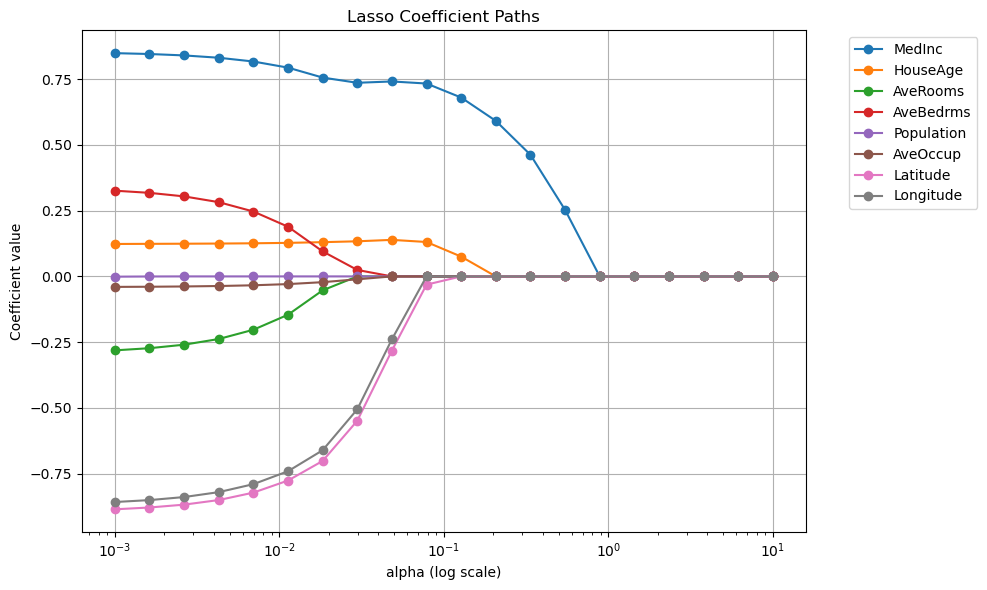

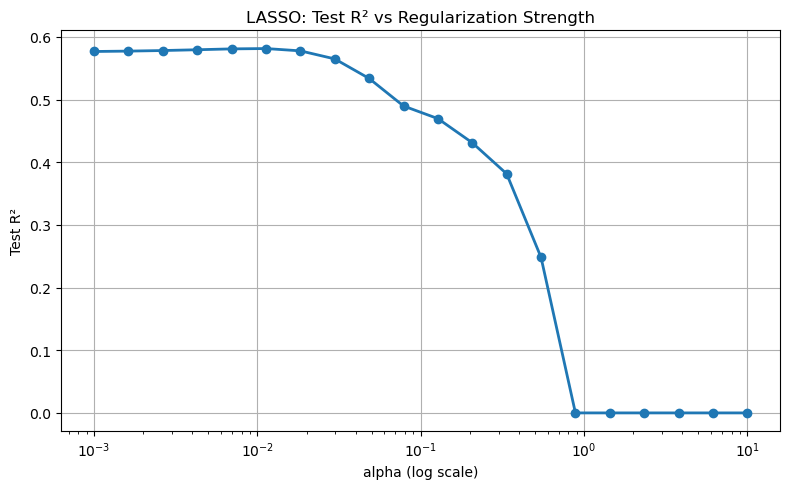

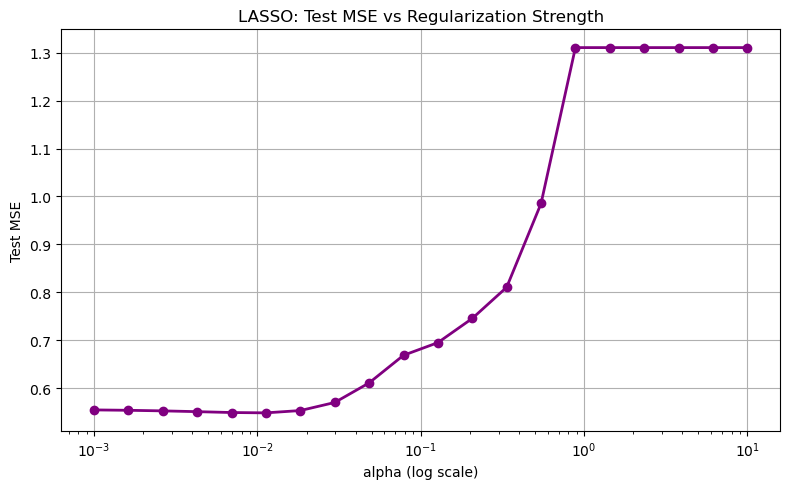

In [9]:
alphas = np.logspace(-3, 1, 20)

results = lasso_alpha_sweep(
    X_train_scaled, y_train,
    X_test_scaled, y_test,
    alphas,
    data.feature_names
)

# Best subsect selection

In [10]:
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

In [11]:
def best_subset_selection(X_train, y_train, X_test, y_test, feature_names):
    """
    Perform exhaustive best-subset selection.

    For each model size k = 1 ... p, evaluate all subsets of size k and select
    the subset that achieves the highest test-set R².

    Parameters
    ----------
    X_train, X_test : ndarray
        Scaled feature matrices.
    y_train, y_test : ndarray
        Target vectors.
    feature_names : list of str
        Names of the p input features.

    Returns
    -------
    results : list of dict
        Each dictionary contains:
        - 'k': model size
        - 'subset': tuple of selected feature indices
        - 'r2': best R² for this k
        - 'coef': full-length coefficient vector (zeros for excluded features)
    """
    n_features = X_train.shape[1]
    results = []         # store (k, subset, r2, coef_vector)
    
    for k in range(1, n_features + 1):
        print(f"Evaluating subsets of size k = {k}...")
        
        best_r2 = -np.inf
        best_subset = None
        best_coef = None
        
        for subset in itertools.combinations(range(n_features), k):
            X_train_sub = X_train[:, subset]
            X_test_sub  = X_test[:, subset]

            model = LinearRegression()
            model.fit(X_train_sub, y_train)
            r2 = model.score(X_test_sub, y_test)

            if r2 > best_r2:
                best_r2 = r2
                best_subset = subset
                # store coefficients in full p-length vector
                full_coef = np.zeros(n_features)
                full_coef[list(subset)] = model.coef_
                best_coef = full_coef
        
        results.append({
            "k": k,
            "subset": best_subset,
            "r2": best_r2,
            "coef": best_coef
        })
    
    return results


In [12]:
best_results = best_subset_selection(
    X_train_scaled, y_train,
    X_test_scaled, y_test,
    feature_names=data.feature_names
)
best_results

Evaluating subsets of size k = 1...
Evaluating subsets of size k = 2...
Evaluating subsets of size k = 3...
Evaluating subsets of size k = 4...
Evaluating subsets of size k = 5...
Evaluating subsets of size k = 6...
Evaluating subsets of size k = 7...
Evaluating subsets of size k = 8...


[{'k': 1,
  'subset': (0,),
  'r2': 0.45885918903846656,
  'coef': array([0.79851956, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ])},
 {'k': 2,
  'subset': (0, 1),
  'r2': 0.4940606792889837,
  'coef': array([0.82533949, 0.2203573 , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ])},
 {'k': 3,
  'subset': (0, 6, 7),
  'r2': 0.5720551152709819,
  'coef': array([ 0.70251884,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        , -1.03214159, -0.99581707])},
 {'k': 4,
  'subset': (0, 1, 6, 7),
  'r2': 0.5810616616067165,
  'coef': array([ 0.72574691,  0.12151924,  0.        ,  0.        ,  0.        ,
          0.        , -0.94310463, -0.90073509])},
 {'k': 5,
  'subset': (0, 1, 5, 6, 7),
  'r2': 0.5819916213547502,
  'coef': array([ 0.7269862 ,  0.12255772,  0.        ,  0.        ,  0.        ,
         -0.03854788, -0.94028074, -0.89802062])},
 {'k': 6,
  'subset': (0, 1, 2, 5, 6, 7),
  

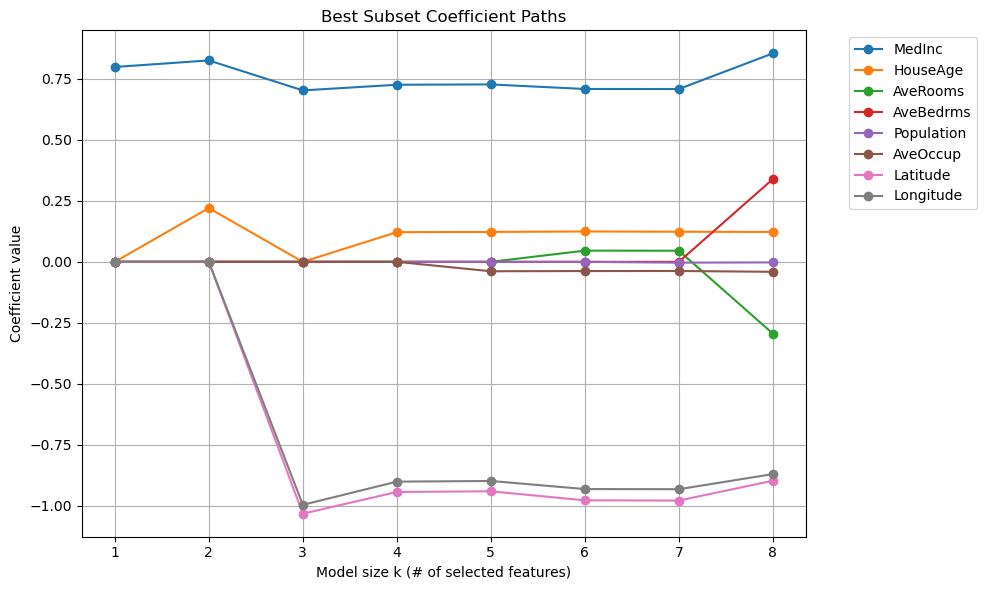

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data
k_values = [r["k"] for r in best_results]
coef_matrix = np.array([r["coef"] for r in best_results])   # shape (n_k, n_features)
feature_names = data.feature_names

plt.figure(figsize=(10, 6))

for j in range(coef_matrix.shape[1]):
    plt.plot(k_values, coef_matrix[:, j], marker="o", label=feature_names[j])

plt.xlabel("Model size k (# of selected features)")
plt.ylabel("Coefficient value")
plt.title("Best Subset Coefficient Paths")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


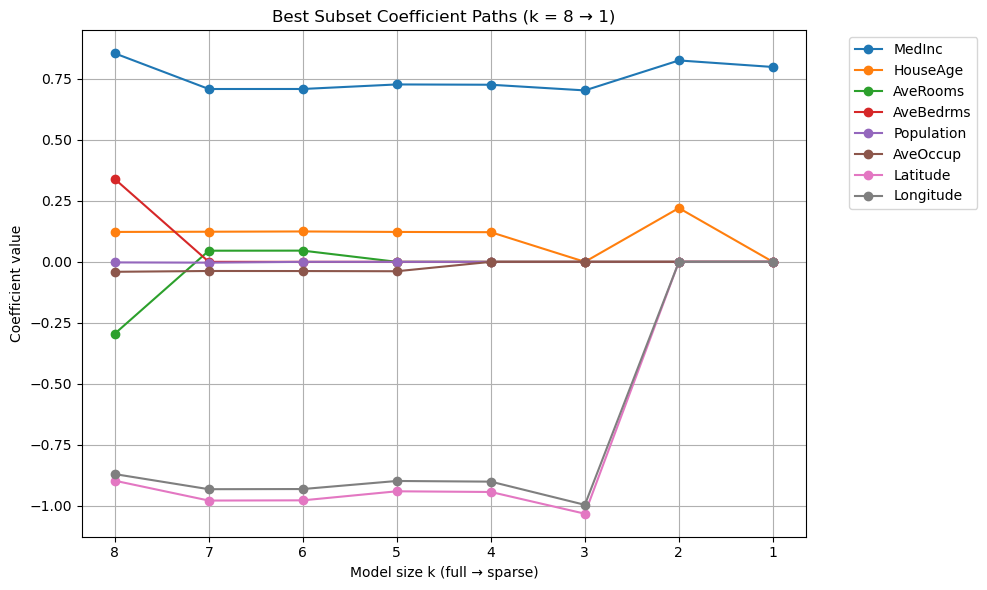

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data
k_values = np.array([r["k"] for r in best_results])
coef_matrix = np.array([r["coef"] for r in best_results])
feature_names = data.feature_names

# Reverse order manually (8→1)
k_rev = k_values[::-1]
coef_rev = coef_matrix[::-1]

plt.figure(figsize=(10, 6))

for j in range(coef_rev.shape[1]):
    plt.plot(k_rev, coef_rev[:, j], marker="o", label=feature_names[j])

plt.xlabel("Model size k (full → sparse)")
plt.ylabel("Coefficient value")
plt.title("Best Subset Coefficient Paths (k = 8 → 1)")

plt.grid(True)

plt.gca().invert_xaxis()

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Shared y-axis: -1.2207940486576436 to 1.0430354927072651


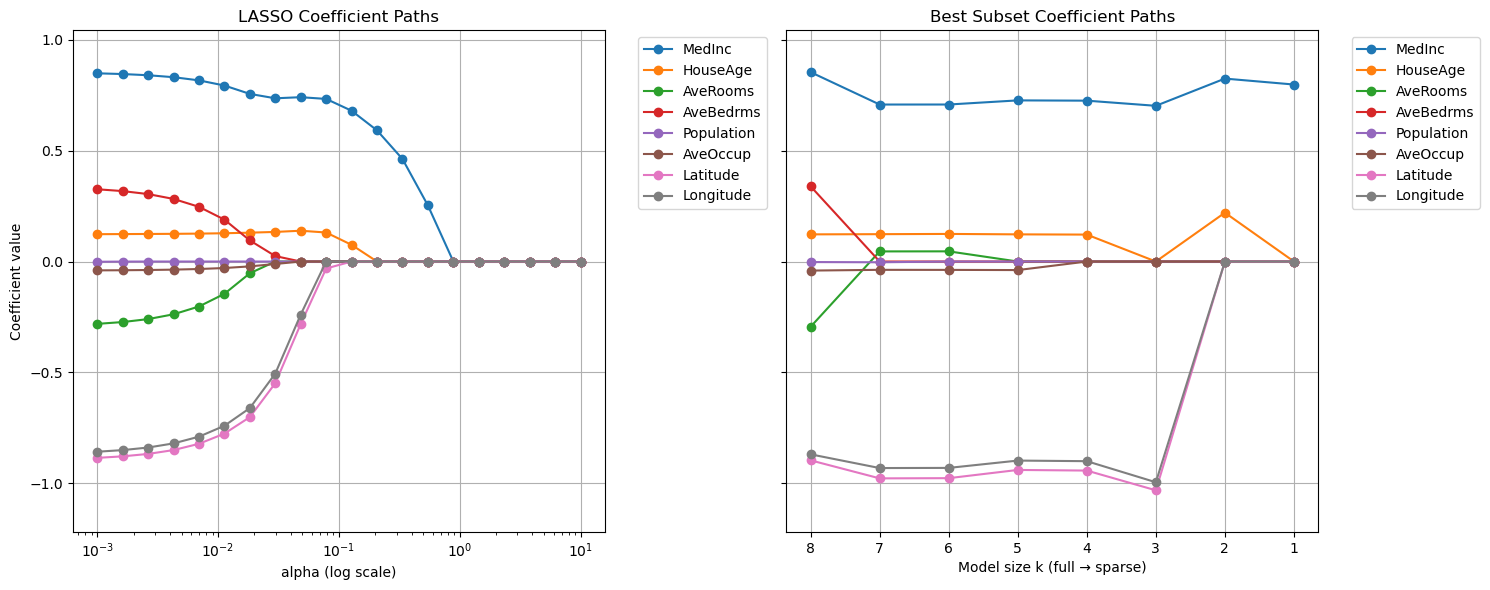

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# Prepare LASSO coefficient data
# ============================================================
lasso_coefs = np.array(results["coefs"])    # shape (n_alpha, p)

# ============================================================
# Prepare Best Subset coefficient data
# ============================================================
k_vals = np.array([r["k"] for r in best_results])         # [1,2,...,8]
coef_bs = np.array([r["coef"] for r in best_results])     # shape (8, p)

# Reverse order for full → sparse
k_rev = k_vals[::-1]                     # [8,7,6,5,4,3,2,1]
coef_bs_rev = coef_bs[::-1]              # matching reversed rows

feature_names = data.feature_names

# ============================================================
# Shared y-axis range for both plots
# ============================================================
global_min = min(lasso_coefs.min(), coef_bs_rev.min())
global_max = max(lasso_coefs.max(), coef_bs_rev.max())

padding = 0.1 * (global_max - global_min)
ymin = global_min - padding
ymax = global_max + padding

print("Shared y-axis:", ymin, "to", ymax)


# ============================================================
#        SIDE-BY-SIDE FIGURE (LASSO | BEST SUBSET)
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# ------------------------------------------------------------
# LEFT: LASSO coefficient paths
# ------------------------------------------------------------
ax = axes[0]

for j in range(lasso_coefs.shape[1]):
    ax.semilogx(alphas, lasso_coefs[:, j], marker="o")

ax.set_xlabel("alpha (log scale)")
ax.set_ylabel("Coefficient value")
ax.set_title("LASSO Coefficient Paths")
ax.grid(True)
ax.set_ylim([ymin, ymax])
ax.legend(feature_names, bbox_to_anchor=(1.05, 1), loc="upper left")


# ------------------------------------------------------------
# RIGHT: Best Subset coefficient paths (k = 8 → 1)
# ------------------------------------------------------------
ax = axes[1]

for j in range(coef_bs_rev.shape[1]):
    ax.plot(k_rev, coef_bs_rev[:, j], marker="o")

ax.set_xlabel("Model size k (full → sparse)")
ax.set_title("Best Subset Coefficient Paths")
ax.grid(True)
ax.set_ylim([ymin, ymax])
ax.invert_xaxis()     # full model (k=8) on left, sparse (k=1) on right
ax.legend(feature_names, bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()
